In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten, Dropout
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import randint

/Users/mmjahanara/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mmjahanara/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mmjahanara/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
# read data :D

df = pd.read_csv('fer2013.csv')

columns: Index(['emotion', 'pixels', 'Usage'], dtype='object')
size: (35887, 3)
emotions list: [0 2 4 6 3 5 1]
usage list: ['Training' 'PublicTest' 'PrivateTest']

random draw:
emotion: [0. 0. 0. 1. 0. 0. 0.]
usage: Training


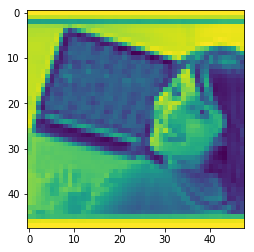

In [4]:
def cnv_1D_to_2D(img_str):
    img = [int(x) for x in img_str.split(' ')]
    img = np.array(img).reshape((48, 48, 1))
    return img

def index_to_one_hot(i, number_of_classes = 7):
    res = np.zeros(number_of_classes)
    res[i] = 1
    return res


print('columns:', df.columns)
print('size:', df.shape)

print('emotions list:', df['emotion'].unique())
print('usage list:', df['Usage'].unique())


df['pixels'] = df['pixels'].apply(cnv_1D_to_2D)
df['emotion'] = df['emotion'].apply(index_to_one_hot)


# make sense of data
def draw_sample(ind):
    print('emotion:', df['emotion'][ind])
    print('usage:', df['Usage'][ind])
    
    img = df.loc[ind, 'pixels']
    plt.imshow(img.reshape((48, 48)))
    plt.show()
    
print('\nrandom draw:')
draw_sample(randint(0, df.shape[0]-1))


In [5]:
# extract train data
X_train = []
for img in df[df['Usage'] == 'Training']['pixels']:
    X_train.append(img)
X_train = np.array(X_train)

Y_train = []
for emo in df[df['Usage'] == 'Training']['emotion']:
    Y_train.append(emo)
Y_train = np.array(Y_train)


# extract test data
X_test = []
for img in df[df['Usage'] == 'PublicTest']['pixels']:
    X_test.append(img)
X_test = np.array(X_test)

Y_test = []
for emo in df[df['Usage'] == 'PublicTest']['emotion']:
    Y_test.append(emo)
Y_test = np.array(Y_test)

In [6]:
# build a simple 
model = Sequential()

model.add(Conv2D(32,(3,3), input_shape=(48, 48,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(7)) # number of classes is 7
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=64, epochs=10)

Epoch 1/10
28709/28709 [==============================] - 49s 2ms/step - loss: 1.9216 - acc: 0.2752
Epoch 2/10
28709/28709 [==============================] - 47s 2ms/step - loss: 1.5751 - acc: 0.3902
Epoch 3/10
28709/28709 [==============================] - 44s 2ms/step - loss: 1.4589 - acc: 0.4405
Epoch 4/10
28709/28709 [==============================] - 44s 2ms/step - loss: 1.3803 - acc: 0.4722: 2s - 
Epoch 5/10
28709/28709 [==============================] - 47s 2ms/step - loss: 1.3232 - acc: 0.4966
Epoch 6/10
28709/28709 [==============================] - 47s 2ms/step - loss: 1.2581 - acc: 0.5218
Epoch 7/10
28709/28709 [==============================] - 46s 2ms/step - loss: 1.2084 - acc: 0.5419
Epoch 8/10
28709/28709 [==============================] - 46s 2ms/step - loss: 1.1686 - acc: 0.5556
Epoch 9/10
28709/28709 [==============================] - 45s 2ms/step - loss: 1.1124 - acc: 0.5795
Epoch 10/10
28709/28709 [==============================] - 45s 2ms/step - loss: 1.0665 - acc:

In [7]:
model.save('./model01')

In [8]:
score = model.evaluate(X_test, Y_test)

3589/3589 [==============================] - 2s 634us/step


In [9]:
print(score)

[1.2826062089123411, 0.5302312621983288]
